**Load all the required libraries**

In [429]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [430]:
#loading and reading the loan data using pandas
loan_df = pd.read_csv("loan.csv")

In [431]:
# print top 5 rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [432]:
# Check number of rows and columns
loan_df.shape

(39717, 111)

In [433]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [434]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


**Data Cleaning**

In [435]:
# Rows and columns with missing values
print("# empty rows: {}".format(loan_df.isnull().all(axis=1).sum()))
print("# empty columns: {}".format(loan_df.isnull().all(axis=0).sum()))



# empty rows: 0
# empty columns: 54


In [436]:
# Count the number of missing values in each column 
print(loan_df.isna().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


We can see a lot of cloumns have missing values for all 39717 rows, we can remove these

In [437]:
# remove columns where all elements are missing
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [438]:
# check shape again to find number of columns now
loan_df.shape

(39717, 57)

In [439]:
# check columns with any missing values
print(loan_df.isna().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

We can see few of columns have more than 12000 missing values, we can remove these as well. We have total rows 39717 and if we divide 12000/39717 then we can say from below calculation we can remove columns more than 30% missing values

In [440]:
percentage_calculation_to_drop_columns =(12000/39717) * 100
percentage_calculation_to_drop_columns

30.213762368758967

In [441]:
# so we can remove columns more than 30% missing values.
percentage_missing_column = loan_df.isnull().sum() * 100 / len(loan_df)
loan_df.drop(percentage_missing_column[ percentage_missing_column > 30 ].index, axis=1, inplace=True)

In [442]:
# check shape again to find number of columns now
loan_df.shape

(39717, 53)

In [443]:
loan_df.nunique().sort_values().head(53)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [444]:
# from above command we can see all the columns which have same value, removing these
loan_df.drop(columns=loan_df.columns[loan_df.nunique()==1], inplace=True)

In [445]:
loan_df.shape

(39717, 44)

In [446]:
loan_df.nunique().sort_values().head(44)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc



```
we can also remove member_id, url and id column as these have all different values and will not impact analysis
```



In [447]:
loan_df.drop(['id', 'member_id', 'url'], axis=1, inplace=True)

In [448]:
loan_df.shape

(39717, 41)

We can also remove few other columns which will not provide any insight for our analysis like "title", "emp_title", "zip_code"

In [449]:
loan_df.drop(["title", "emp_title", "zip_code"], axis=1, inplace=True)
loan_df.shape

(39717, 38)

As per the business objective, the company wants to understand the driving factors (or driver variables) behind loan default so we can also remove all the columns which are used after loan is approved. We can also remove these column by checking given data dictioary excel file

In [450]:
loan_df.drop(["total_pymnt","last_credit_pull_d","out_prncp","total_pymnt_inv","out_prncp_inv","total_rec_prncp","total_rec_int","last_pymnt_d","last_pymnt_amnt","collection_recovery_fee","recoveries", "total_rec_late_fee"], axis = 1, inplace = True)

In [451]:
loan_df.shape

(39717, 26)

In [452]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

As per the business objective, the company wants to understand the driving factors (or driver variables) behind loan default so we can remove all the data for current loan status because if someone missed any installment he/she can pay remaining balance within timeframe also he someone is paying all the installments on time, may be he/she can miss later installments so we cannot use this data for analysis

In [453]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Here we can see 1140 rows are for current status, we can exclude these rows.

In [454]:
loan_df = loan_df[loan_df.loan_status != "Current"]


In [455]:
loan_df.shape

(38577, 26)

We can also analyis loan based on terms data

In [456]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

We can see more people are taking shorter term

we can also check stat for int_rate

In [457]:
loan_df.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

In [458]:
loan_df.int_rate.tail()

39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, dtype: object

We need to remove % and covert it to numeric for proper analysis

In [459]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [460]:
loan_df.int_rate.tail()

39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, dtype: float64

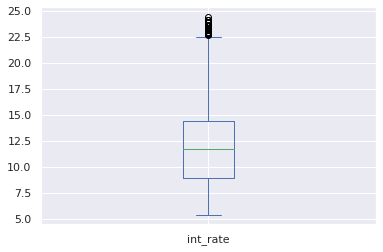

In [461]:
loan_df['int_rate'].plot.box()

We can see lots of outlier in int_rate

We can also convert other data which is needed in numeric format

In [462]:
coulumns_to_numeric = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']
loan_df[coulumns_to_numeric] = loan_df[coulumns_to_numeric].apply(pd.to_numeric)

In [463]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


delinq_2yrs and pub_rec_bankruptcies do not provide any useful information so dropping these columns

In [464]:
loan_df.drop(['delinq_2yrs'], axis=1, inplace=True)

In [465]:
loan_df.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [466]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [467]:
loan_df.shape

(38577, 24)

Now lets check missing values

In [468]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

We can see two columns "emp_length", "revol_util" with missing values

In [469]:
loan_df.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

In [470]:
loan_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [471]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [472]:
loan_df.emp_length.isna().sum()

1033

In [473]:
loan_df.revol_util.isna().sum()

50

In [474]:
loan_df.shape

(38577, 24)

In [475]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [476]:
loan_df.revol_util.isna().sum()

0

Removing % from revol_util column

In [477]:
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [478]:
 loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [479]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   funded_amnt_inv      38527 non-null  float64
 3   term                 38527 non-null  object 
 4   int_rate             38527 non-null  float64
 5   installment          38527 non-null  float64
 6   grade                38527 non-null  object 
 7   sub_grade            38527 non-null  object 
 8   emp_length           37497 non-null  object 
 9   home_ownership       38527 non-null  object 
 10  annual_inc           38527 non-null  float64
 11  verification_status  38527 non-null  object 
 12  issue_d              38527 non-null  object 
 13  loan_status          38527 non-null  object 
 14  purpose              38527 non-null  object 
 15  addr_state           38527 non-null 

Now, we need to check outliers for numeric values columns

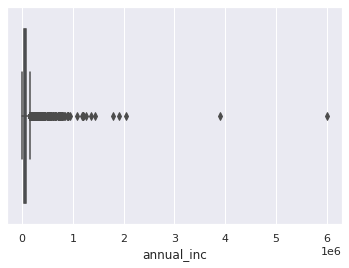

In [480]:
# for annual_inc
sns.boxplot(loan_df['annual_inc'])

In [481]:
# need to remove outlier for annual_inc
quantile_info = loan_df['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [482]:
# need to remove values after 95 percentile because of outliers
n95p_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df= loan_df[loan_df.annual_inc <= n95p_annual_inc]

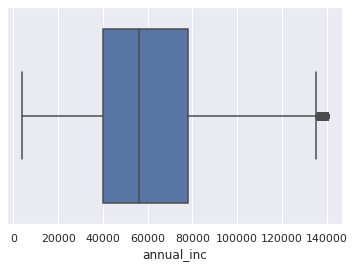

In [483]:
sns.boxplot(loan_df.annual_inc)
plt.show()

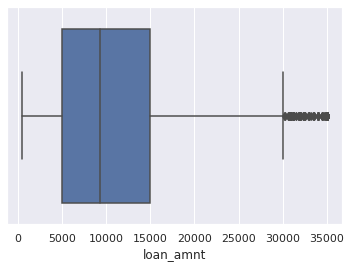

In [484]:
sns.boxplot(loan_df.loan_amnt)

In [485]:
loan_df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

loan_amnt seems ok

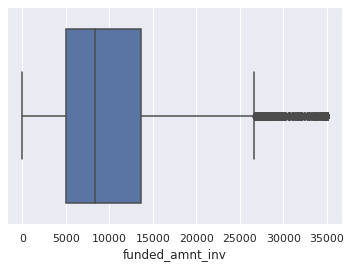

In [486]:
sns.boxplot(loan_df.funded_amnt_inv)

In [487]:
loan_df.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

funded_amnt_inv seems ok

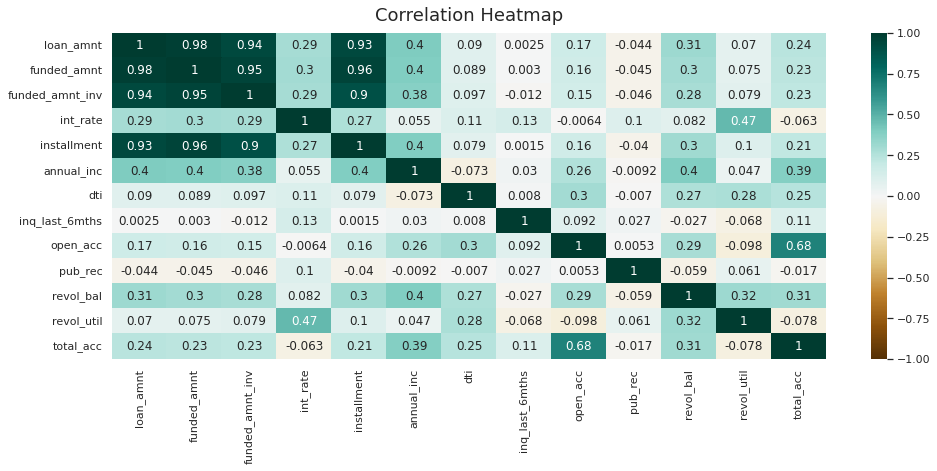

In [488]:
# check correlation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(loan_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Now lets check categorical data

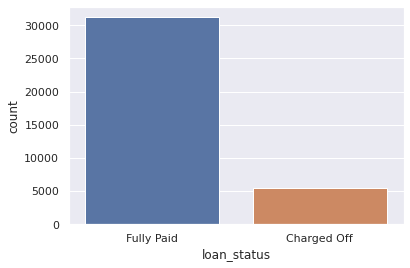

In [489]:
sns.countplot(x = 'loan_status', data = loan_df)

In [490]:
# Grade vs Charged Off 
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

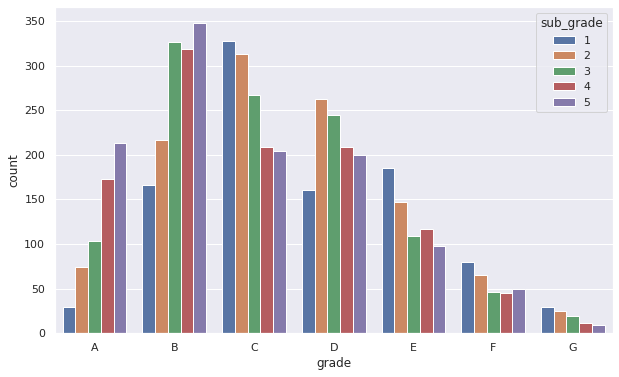

In [491]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])
plt.show()

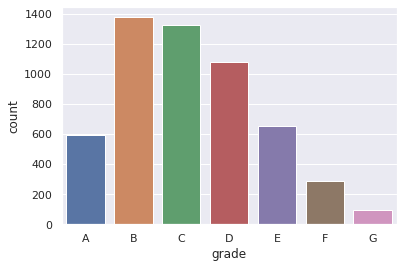

In [492]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

In [493]:
# home_ownership vs charged off 
loan_df.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [494]:
# We can change NONE to OTHER because of only 3 values
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [495]:
loan_df.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

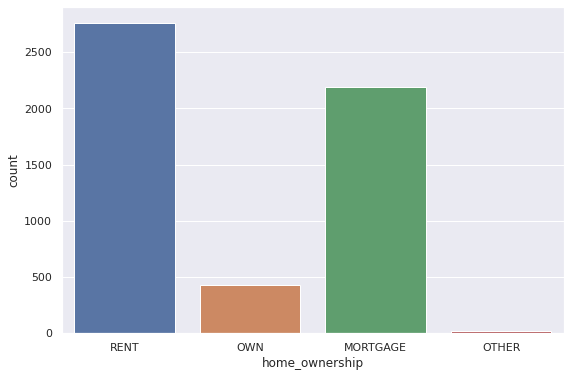

In [496]:
fig, ax = plt.subplots(figsize = (9,6))
sns.set_theme(style="darkgrid")
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [497]:
# purpose vs charged off 
loan_df.purpose.value_counts()

debt_consolidation    17293
credit_card            4782
other                  3686
home_improvement       2551
major_purchase         2041
small_business         1622
car                    1446
wedding                 892
medical                 639
moving                  548
vacation                364
house                   338
educational             309
renewable_energy         95
Name: purpose, dtype: int64

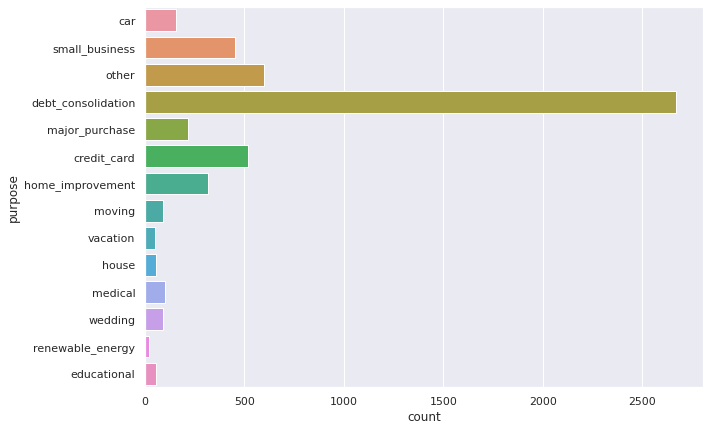

In [498]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(y='purpose', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [499]:
# interest rate vs charged off 
loan_df['int_rate_grp'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-14%','15%-19%','20%-24%','24%-27%'])

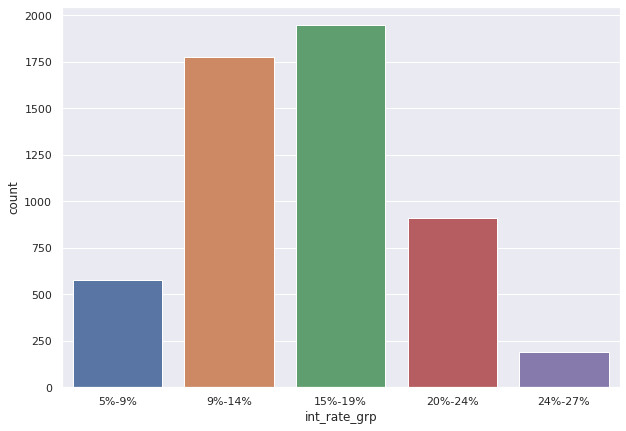

In [500]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='int_rate_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()


In [501]:
loan_df.annual_inc.value_counts

<bound method IndexOpsMixin.value_counts of 0         24000.0
1         30000.0
2         12252.0
3         49200.0
5         36000.0
           ...   
39711     75000.0
39712    110000.0
39713     18000.0
39714    100000.0
39716     22000.0
Name: annual_inc, Length: 36606, dtype: float64>

In [502]:
# annual_inc vs charged off
loan_df['annual_inc_grp'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['5k-30k','30k-59k','59k-85k','85k-110k','110k-150k'])

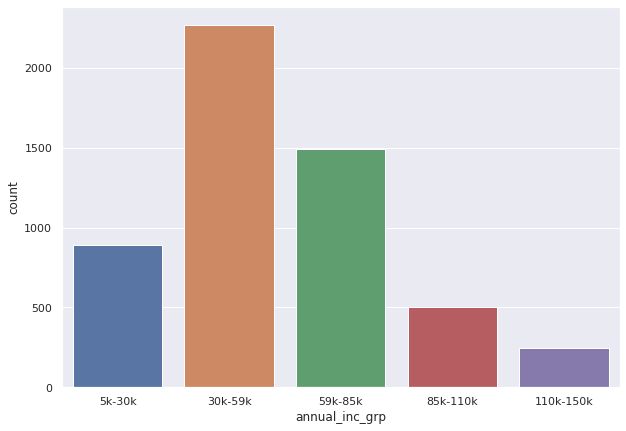

In [503]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='annual_inc_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [504]:
# o$ vs charged off
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

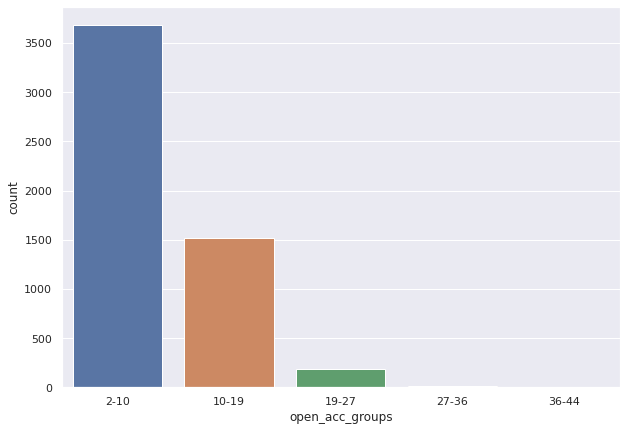

In [505]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='open_acc_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [506]:
# total_acc vs charged off
loan_df['total_acc_grp'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])

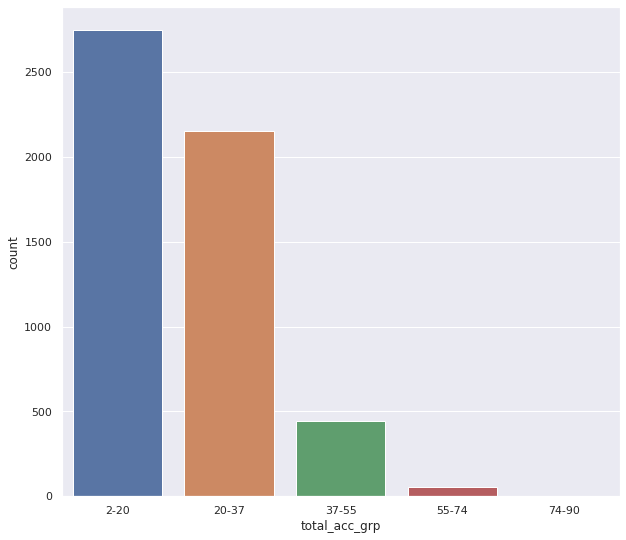

In [507]:
fig, ax = plt.subplots(figsize = (10,9))
sns.set_theme(style="darkgrid")
sns.countplot(x='total_acc_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [508]:
#emp_length vs charged off
loan_df.emp_length.value_counts()

10+ years    7887
< 1 year     4315
2 years      4096
3 years      3820
4 years      3194
5 years      3040
1 year       3037
6 years      2070
7 years      1641
8 years      1342
9 years      1153
Name: emp_length, dtype: int64

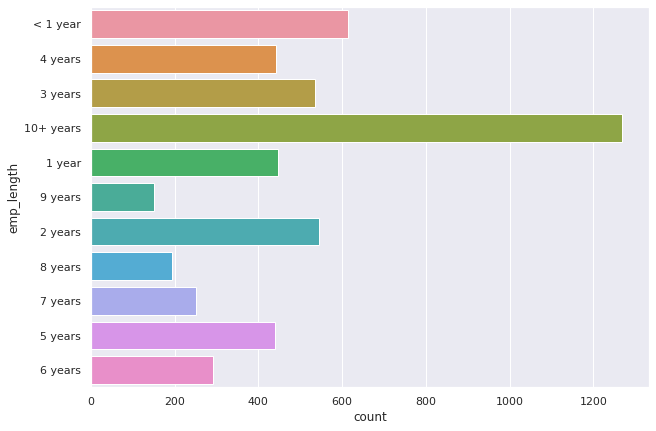

In [509]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(y='emp_length', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [510]:
# installment vs charged off
loan_df.installment.value_counts()

311.11    65
180.96    56
311.02    52
150.80    46
372.12    44
          ..
158.26     1
464.53     1
274.21     1
215.74     1
255.43     1
Name: installment, Length: 14563, dtype: int64

In [511]:
loan_df['installment_grp'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['1-150','150-300','300-450','450-600','600-750','750-900','900-1050','1050-1200','1200-1350','1350-1500'])


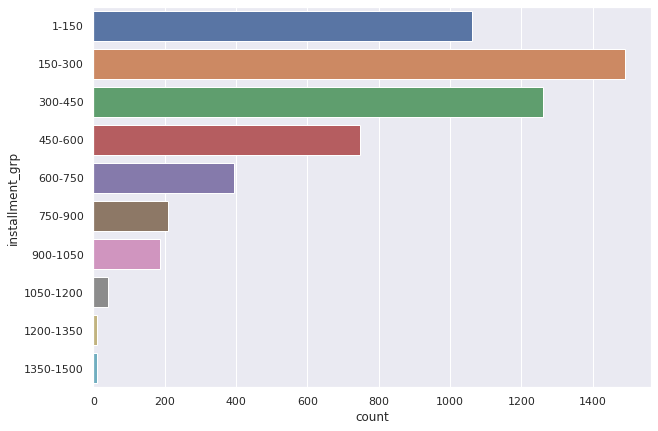

In [512]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(y='installment_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [513]:
# revol_util vs charged off
loan_df['revol_util_grp'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])

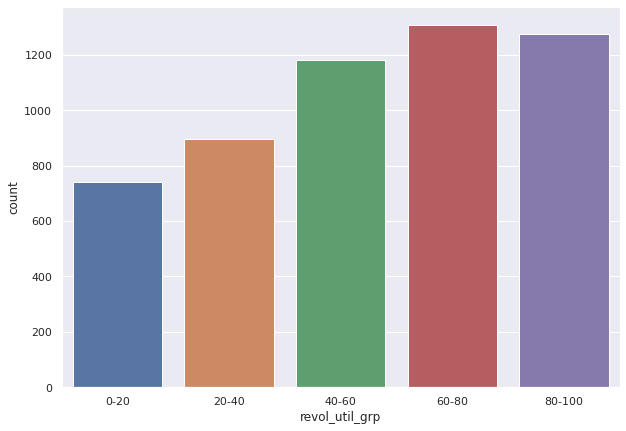

In [514]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='revol_util_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [515]:
# loan_amnt vs charged off
loan_df['loan_amnt_grp'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


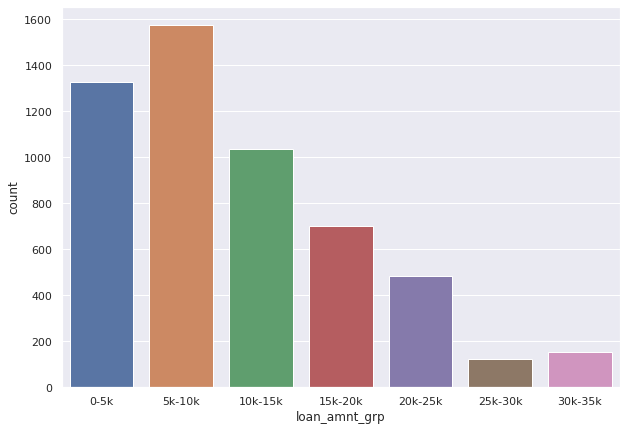

In [516]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='loan_amnt_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [517]:
# funded_amnt_inv vs charged off
loan_df['funded_amnt_inv_grp'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

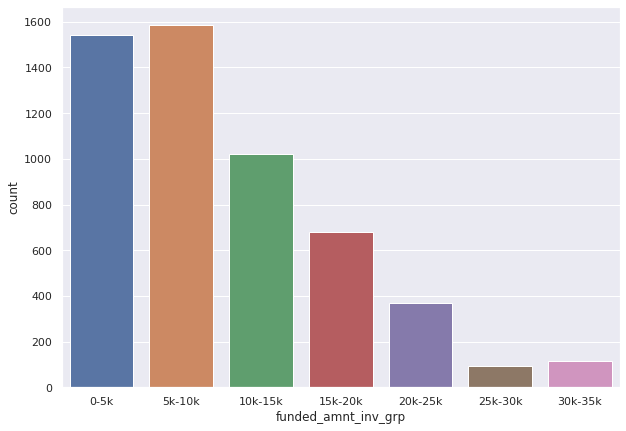

In [518]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='funded_amnt_inv_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

In [519]:
# dti vs charged off
loan_df['dti_grp'] = pd.cut(loan_df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25-3'])

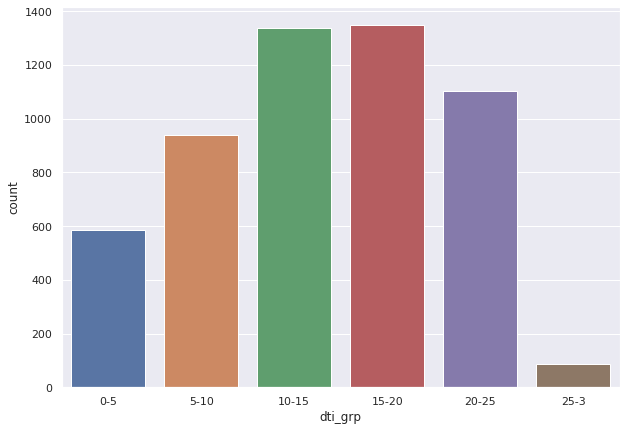

In [520]:
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='dti_grp', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

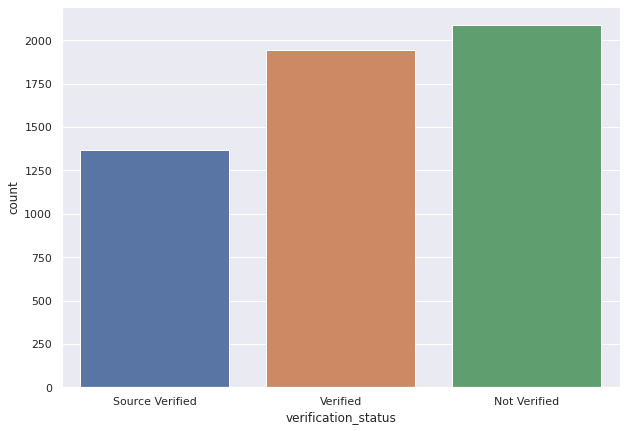

In [521]:
# verification_status vs charged off
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

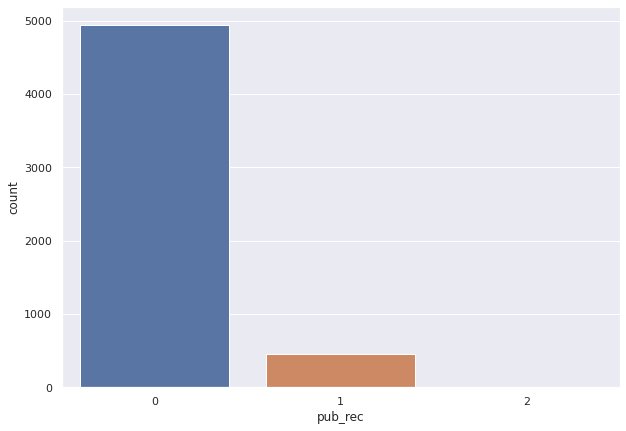

In [522]:
# pub_rec vs charged off
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='pub_rec', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

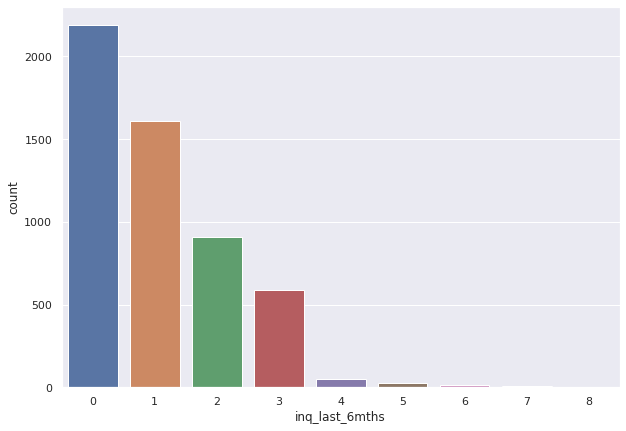

In [523]:
# inq_last_6mths vs charged off
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

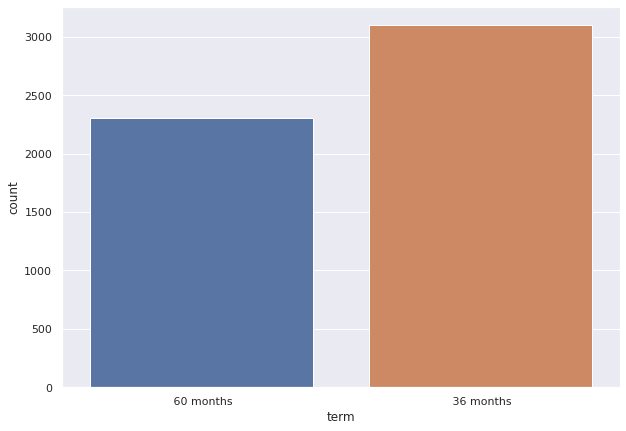

In [524]:
# term vs charged off
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='term', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

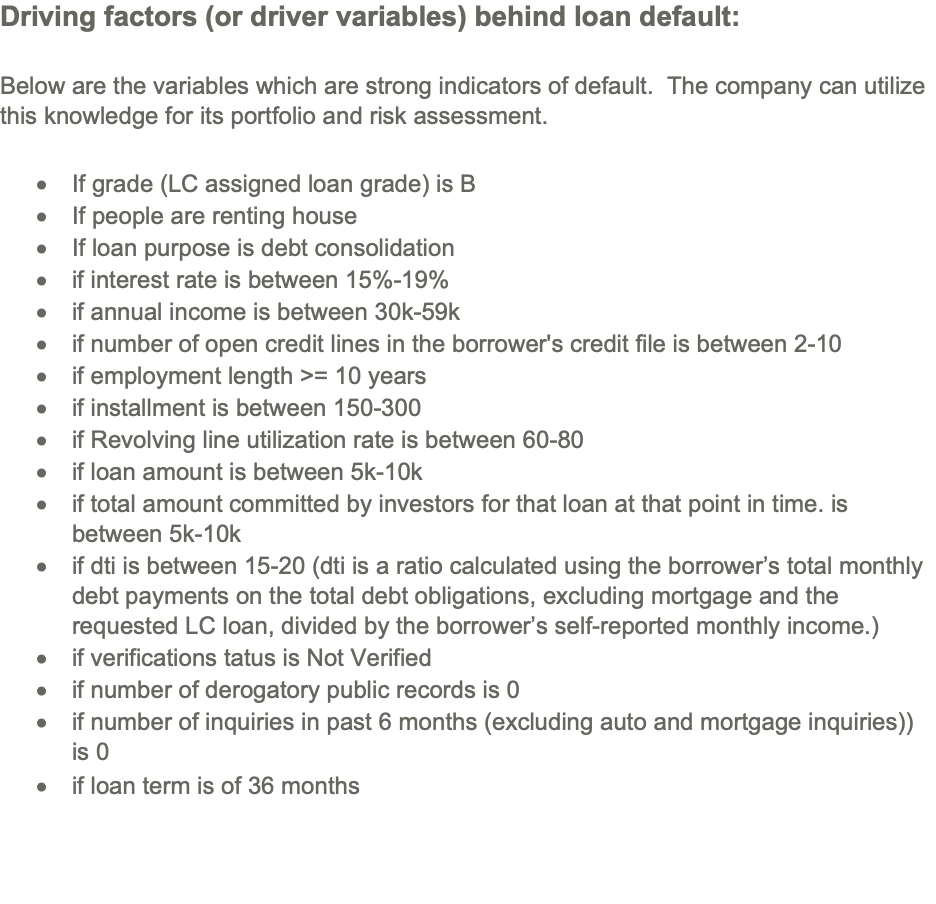